# Coffee Shop Sales Analysis

## Introduction 

Key business insights include:

- Which stores have the best sales performance?
- What products or categories contribute the most to revenue?
- What is the sales trend over time?
- How does product pricing affect sales quantities?
- How can products be classified by size (regular, large, small, shot, syrup) and performance?

## Import Library and Data

In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_excel('C:/Users/user/OneDrive/Documents/GitHub/Data-Analysis-Portfolio/coffee-shop-sales/Coffee Shop Sales.xlsx')

In [3]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


## General Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df.shape

(149116, 11)

In [6]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
df.nunique().reset_index()

,index,0
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [9]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [10]:
df.describe(include= object)

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


## Pre-Processing

### Enhance Data Quality

In [11]:
# Define a function to extract the product size and product name
def extract_product_info(product_detail):
    # Define patterns for size and format
    size_pattern = r'(Rg|Lg|Sm|shot|syrup)$'
    
    # Match size
    size_match = re.search(size_pattern, product_detail)
    
    if size_match:
        # Map size abbreviations to full names
        size_map = {'Rg': 'regular', 'Lg': 'large', 'Sm': 'small', 'shot': 'shot', 'syrup': 'syrup'}
        product_size = size_map.get(size_match.group(), 'unknown')
        
        # Remove size from product name
        product_name = re.sub(size_pattern, '', product_detail).strip()
    else:
        # If no size is found, set size as 'unknown' and product name as original detail
        product_size = 'unknown'
        product_name = product_detail.strip()

    return product_size, product_name

In [12]:
# Apply the function to create the new columns
df[['product_size', 'product_name']] = df['product_detail'].apply(lambda x: pd.Series(extract_product_info(x)))

In [13]:
df[['product_detail', 'product_size', 'product_name']].sample(15)

,product_detail,product_size,product_name
15652,Ethiopia Lg,large,Ethiopia
109579,Serenity Green Tea Lg,large,Serenity Green Tea
39954,Our Old Time Diner Blend Rg,regular,Our Old Time Diner Blend
277,Latte Rg,regular,Latte
28314,Columbian Medium Roast Sm,small,Columbian Medium Roast
5172,Sustainably Grown Organic Rg,regular,Sustainably Grown Organic
56767,Lemon Grass Lg,large,Lemon Grass
140822,Ethiopia Rg,regular,Ethiopia
15575,Lemon Grass Rg,regular,Lemon Grass
1969,Sustainably Grown Organic Rg,regular,Sustainably Grown Organic


In [14]:
df.sample(15)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,product_size,product_name
137200,137537,2023-06-20,11:56:20,1,5,Lower Manhattan,76,3.50,Bakery,Biscotti,Chocolate Chip Biscotti,unknown,Chocolate Chip Biscotti
89056,89310,2023-05-09,09:38:20,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,large,Spicy Eye Opener Chai
52695,52802,2023-03-28,12:17:06,1,3,Astoria,40,3.75,Coffee,Barista Espresso,Cappuccino,unknown,Cappuccino
87710,87964,2023-05-08,08:43:42,2,8,Hell's Kitchen,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,large,Dark chocolate
62123,62293,2023-04-09,16:48:23,1,5,Lower Manhattan,31,2.20,Coffee,Gourmet brewed coffee,Ethiopia Sm,small,Ethiopia
76433,76603,2023-04-26,09:30:09,2,5,Lower Manhattan,27,3.50,Coffee,Organic brewed coffee,Brazilian Lg,large,Brazilian
17249,17279,2023-01-31,16:34:14,1,3,Astoria,38,3.75,Coffee,Barista Espresso,Latte,unknown,Latte
133008,133345,2023-06-17,08:39:24,1,3,Astoria,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg,large,Ethiopia
110607,110861,2023-05-28,16:33:39,2,8,Hell's Kitchen,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,regular,Dark chocolate
143850,144187,2023-06-26,09:19:02,3,5,Lower Manhattan,60,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Rg,regular,Sustainably Grown Organic


## Data Analysis 1

### 1 Sales Trend Over Time

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  product_size      149116 non-null  object        
 12  product_name      149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memor

In [17]:
# Create a revenue column (transaction_qty * unit_price)
df['revenue'] = df['transaction_qty'] * df['unit_price']

In [19]:
# Group by date to get daily revenue
daily_revenue = df.groupby(df['transaction_date'].dt.date)['revenue'].sum()

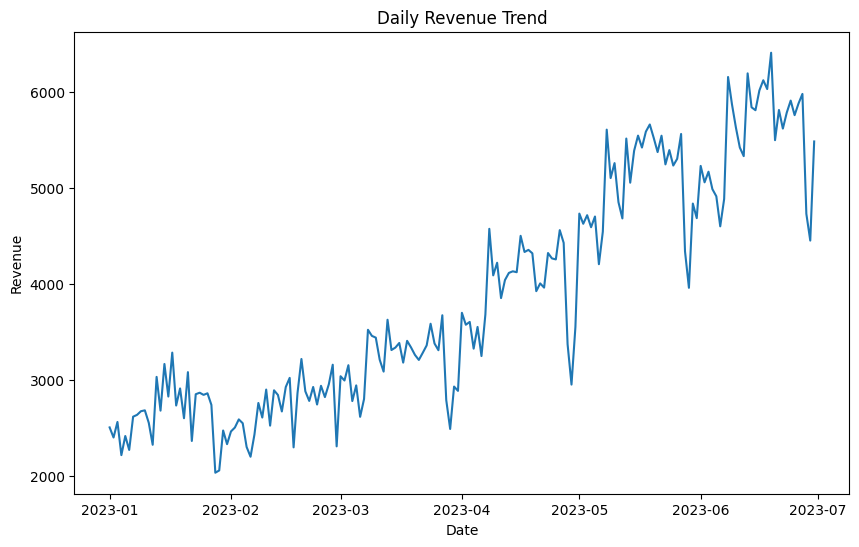

In [21]:
# Plot the trend over time
plt.figure(figsize=(10, 6))
daily_revenue.plot(kind='line', title='Daily Revenue Trend', xlabel='Date', ylabel='Revenue')
plt.show()

### 2 Store Performance Analysis

In [22]:
# Total revenue per store
store_performance = df.groupby('store_location')['revenue'].sum().sort_values(ascending=False)

In [23]:
# Total number of transactions per store
transactions_per_store = df.groupby('store_location')['transaction_id'].count()

In [24]:
# Store performance summary
store_summary = pd.DataFrame({
    'Total Revenue': store_performance,
    'Total Transactions': transactions_per_store
})

store_summary

,Total Revenue,Total Transactions
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


### 3 Product Performance and Classification

In [26]:
# Revenue by product category
category_performance = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
category_performance

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: revenue, dtype: float64

In [27]:
# Revenue by product type
product_performance = df.groupby('product_type')['revenue'].sum().sort_values(ascending=False)
product_performance

product_type
Barista Espresso         91406.20
Brewed Chai tea          77081.95
Hot chocolate            72416.00
Gourmet brewed coffee    70034.60
Brewed Black tea         47932.00
Brewed herbal tea        47539.50
Premium brewed coffee    38781.15
Organic brewed coffee    37746.50
Scone                    36866.12
Drip coffee              31984.00
Pastry                   25655.99
Brewed Green tea         23852.50
Biscotti                 19793.53
Premium Beans            14583.50
Organic Beans             8509.50
Housewares                7444.00
Gourmet Beans             6798.00
Clothing                  6163.00
Regular syrup             6084.80
Espresso Beans            5560.25
Chai tea                  4301.25
House blend Beans         3294.00
Herbal tea                2729.75
Drinking Chocolate        2728.04
Black tea                 2711.85
Sugar free syrup          2324.00
Organic Chocolate         1679.60
Green tea                 1470.75
Green beans               1340.00
N

In [28]:
# Best-selling products by quantity
best_selling_products = df.groupby('product_name')['transaction_qty'].sum().sort_values(ascending=False)
best_selling_products

product_name
Ethiopia                        13271
Our Old Time Diner Blend        13074
Columbian Medium Roast          13068
Brazilian                       13012
Jamaican Coffee River           12431
Morning Sunrise Chai             9157
Latte                            9099
Earl Grey                        9095
Peppermint                       9067
Sustainably Grown Organic        9003
Serenity Green Tea               8856
Traditional Blend Chai           8839
Dark chocolate                   8793
Spicy Eye Opener Chai            8697
English Breakfast                8670
Lemon Grass                      8566
Cappuccino                       8417
Espresso                         4165
Ouro Brasileiro                  3262
Chocolate Croissant              3096
Sugar Free Vanilla               2905
Chocolate                        2658
Carmel                           2576
Ginger Scone                     2540
Hazelnut                         2372
Cranberry Scone                  2092

### 4 Classify Products by Size and Performance

In [29]:
# Create a new dataframe for product performance
df_performance = df.groupby('product_id').agg(
    total_revenue=('revenue', 'sum'),
    record_count=('transaction_id', 'count')
).reset_index()

In [30]:
# Classify products based on revenue contribution
df_performance['Product Performance'] = pd.qcut(df_performance['total_revenue'], q=3, labels=['Low', 'Medium', 'High'])

In [31]:
# Merge product details from the original df
df_performance = df_performance.merge(df[['product_id', 'product_detail', 'product_size']].drop_duplicates(), on='product_id', how='left')


In [32]:
# Sort df_performance by total revenue
df_performance = df_performance.sort_values(by='total_revenue', ascending=False)
df_performance

,product_id,total_revenue,record_count,Product Performance,product_detail,product_size
60,61,21151.75,2961,High,Sustainably Grown Organic Lg,large
58,59,21006.00,3029,High,Dark chocolate Lg,large
38,39,19112.25,2896,High,Latte Rg,regular
40,41,17641.75,2772,High,Cappuccino Lg,large
54,55,17384.00,2830,High,Morning Sunrise Chai Lg,large
...,...,...,...,...,...,...
10,11,1360.40,152,Low,Lemon Grass,unknown
9,10,1340.00,134,Low,Guatemalan Sustainably Grown,unknown
17,18,1335.90,122,Low,Spicy Eye Opener Chai,unknown
13,14,1270.90,142,Low,Earl Grey,unknown


### 5 Price Sensitivity Analysis

In [33]:
# Analyze how unit price affects sales quantities
price_qty_relation = df.groupby('unit_price')['transaction_qty'].sum().sort_values(ascending=False)

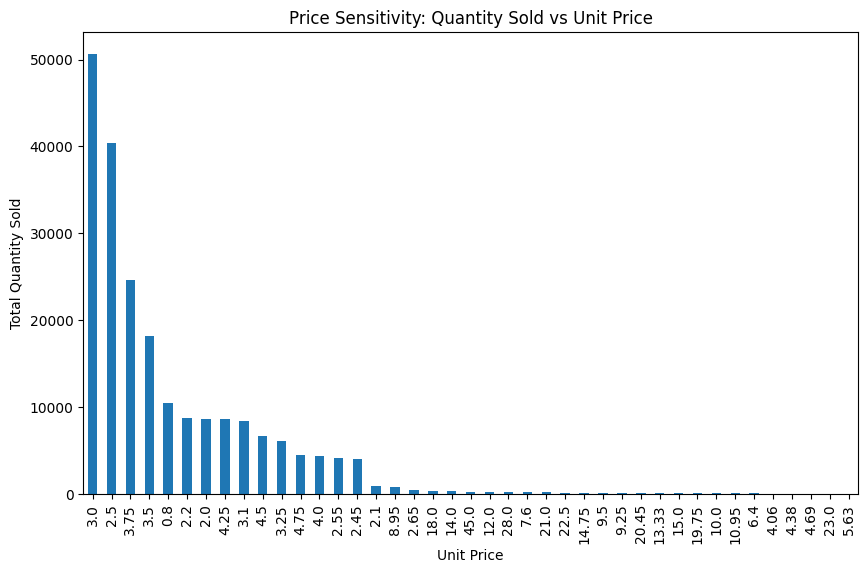

In [34]:
# Plot unit price vs transaction quantity
plt.figure(figsize=(10, 6))
price_qty_relation.plot(kind='bar', title='Price Sensitivity: Quantity Sold vs Unit Price', xlabel='Unit Price', ylabel='Total Quantity Sold')
plt.show()

### 6 Seasonality and Time-Based Sales Patterns

In [72]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,product_size,product_name,revenue,transaction_revenue,transaction_month,time,hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,regular,Ethiopia,6.00,6.00,2023-01,07:06:11,7
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,large,Spicy Eye Opener Chai,6.20,6.20,2023-01,07:08:56,7
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,large,Dark chocolate,9.00,9.00,2023-01,07:14:04,7
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,small,Our Old Time Diner Blend,2.00,2.00,2023-01,07:20:24,7
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,large,Spicy Eye Opener Chai,6.20,6.20,2023-01,07:22:41,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,regular,Peppermint,5.00,5.00,2023-06,20:18:41,20
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,large,English Breakfast,6.00,6.00,2023-06,20:25:10,20
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,large,Peppermint,3.00,3.00,2023-06,20:31:34,20
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,unknown,Cappuccino,3.75,3.75,2023-06,20:57:19,20


In [68]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time


Extract the value and calculate average revenue per day of the hour, week, and month


In [82]:
df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

avg_hourly_revenue = df.groupby('hour')['revenue'].mean()
avg_hourly_revenue

hour
6     4.767146
7     4.730896
8     4.684483
9     4.794502
10    4.781525
11    4.742898
12    4.615617
13    4.632482
14    4.623837
15    4.647856
16    4.522462
17    4.589401
18    4.572713
19    4.669514
20    4.868391
Name: revenue, dtype: float64

In [83]:
df['day_of_week'] = df['transaction_date'].dt.day_name()

avg_daily_revenue = df.groupby('day_of_week')['revenue'].mean()
avg_daily_revenue

day_of_week
Friday       4.671352
Monday       4.697929
Saturday     4.724255
Sunday       4.661088
Thursday     4.653541
Tuesday      4.690875
Wednesday    4.707346
Name: revenue, dtype: float64

In [84]:
df['month'] = df['transaction_date'].dt.month_name()

avg_monthly_revenue = df.groupby('month')['revenue'].mean()
avg_monthly_revenue

month
April       4.694734
February    4.654636
January     4.717439
June        4.709377
March       4.655645
May         4.674673
Name: revenue, dtype: float64

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

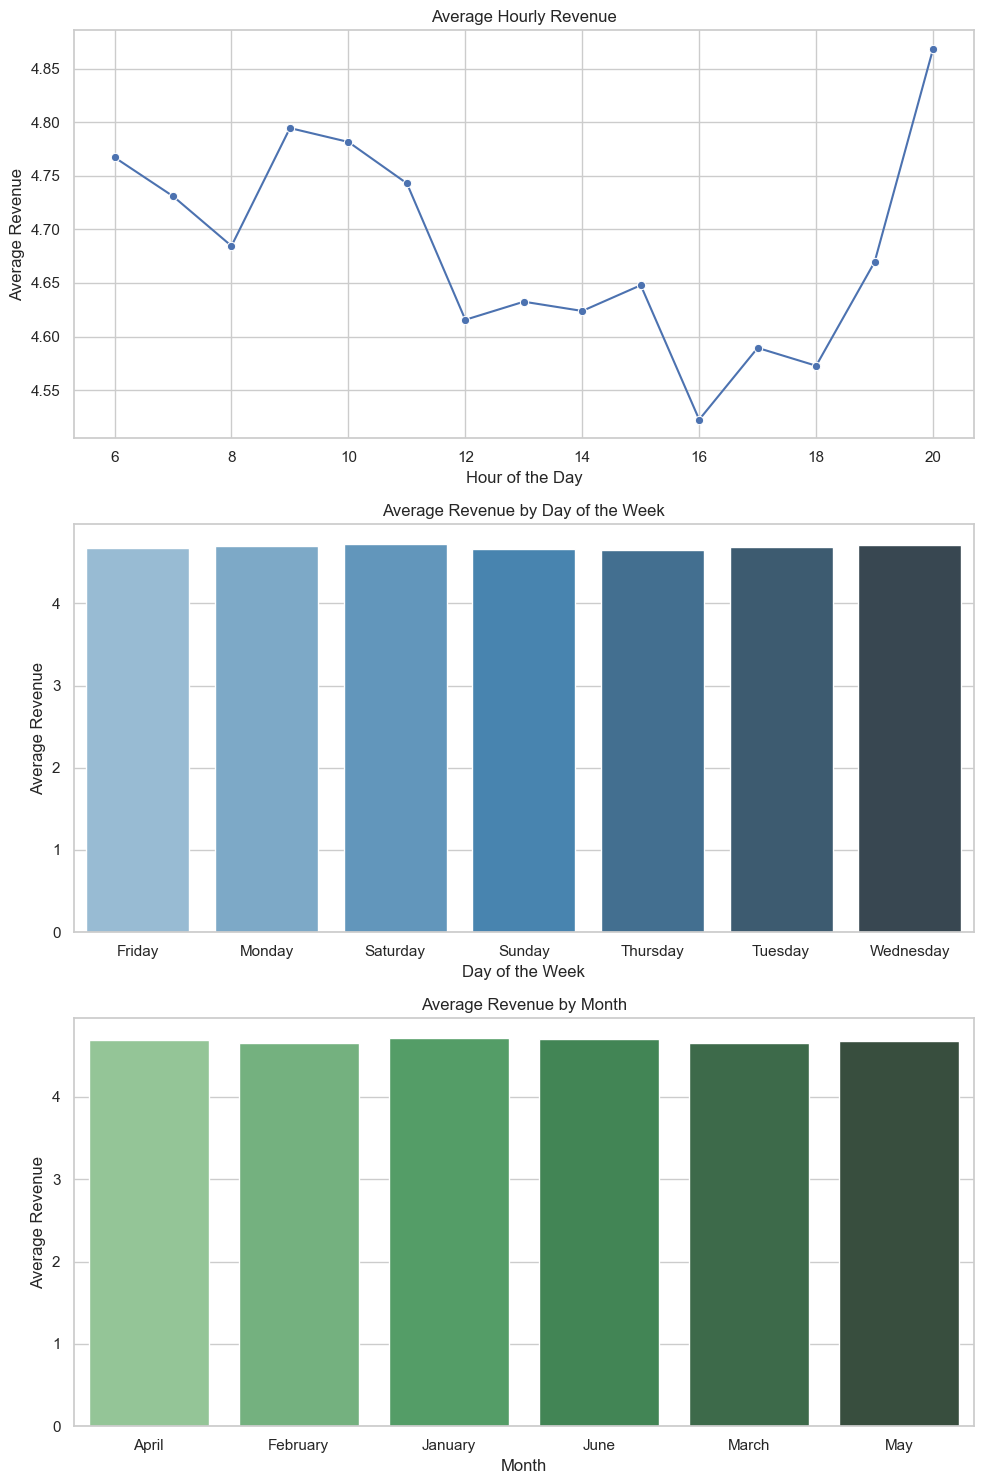

In [85]:
# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create subplots for all three trends
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Hourly Revenue Line Plot
sns.lineplot(x=avg_hourly_revenue.index, y=avg_hourly_revenue.values, ax=ax[0], marker="o")
ax[0].set_title('Average Hourly Revenue')
ax[0].set_xlabel('Hour of the Day')
ax[0].set_ylabel('Average Revenue')

# Daily Revenue Bar Plot
sns.barplot(x=avg_daily_revenue.index, y=avg_daily_revenue.values, ax=ax[1], palette="Blues_d")
ax[1].set_title('Average Revenue by Day of the Week')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Average Revenue')

# Monthly Revenue Bar Plot
sns.barplot(x=avg_monthly_revenue.index, y=avg_monthly_revenue.values, ax=ax[2], palette="Greens_d")
ax[2].set_title('Average Revenue by Month')
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Average Revenue')

# Show the plots
plt.tight_layout()
plt.show()


In [86]:
sum_hourly_revenue = df.groupby('hour')['revenue'].sum()
sum_hourly_revenue

hour
6     21900.27
7     63526.47
8     82699.87
9     85169.53
10    88673.39
11    46319.14
12    40192.79
13    40367.45
14    41304.74
15    41733.10
16    41122.75
17    40134.31
18    34286.20
19    28446.68
20     2935.64
Name: revenue, dtype: float64

In [87]:
sum_daily_revenue = df.groupby('day_of_week')['revenue'].sum()
sum_daily_revenue

day_of_week
Friday       101373.00
Monday       101677.28
Saturday      96894.48
Sunday        98330.31
Thursday     100767.78
Tuesday       99455.94
Wednesday    100313.54
Name: revenue, dtype: float64

In [88]:
sum_monthly_revenue = df.groupby('month')['revenue'].sum()
sum_monthly_revenue

month
April       118941.08
February     76145.19
January      81677.74
June        166485.88
March        98834.68
May         156727.76
Name: revenue, dtype: float64

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN b

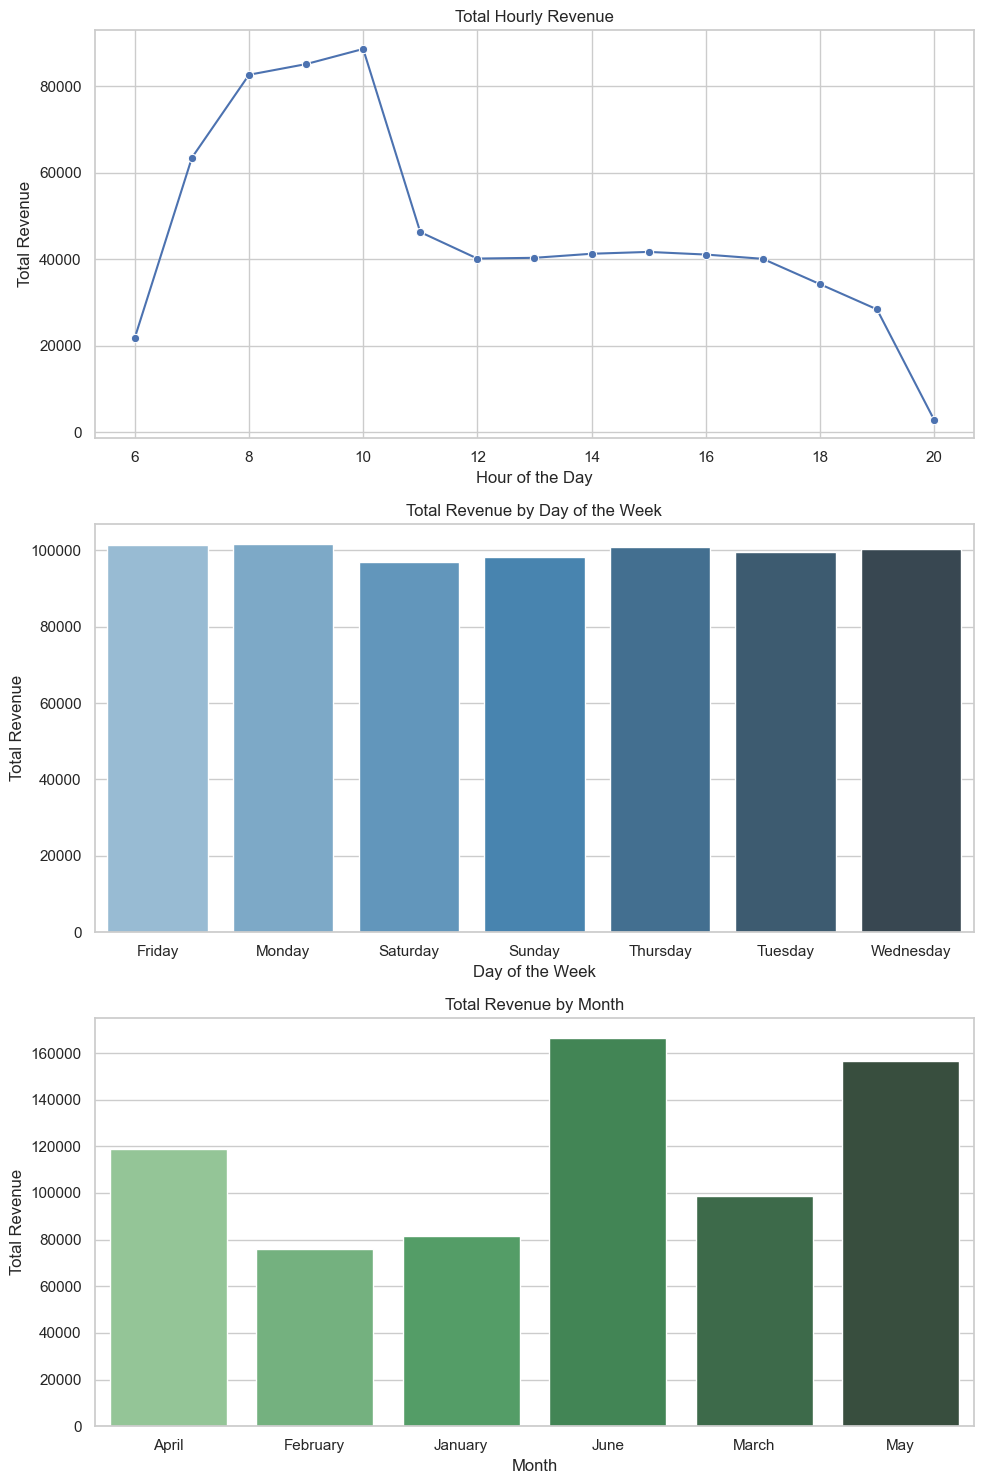

In [89]:
# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create subplots for all three trends
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Hourly Revenue Line Plot
sns.lineplot(x=sum_hourly_revenue.index, y=sum_hourly_revenue.values, ax=ax[0], marker="o")
ax[0].set_title('Total Hourly Revenue')
ax[0].set_xlabel('Hour of the Day')
ax[0].set_ylabel('Total Revenue')

# Daily Revenue Bar Plot
sns.barplot(x=sum_daily_revenue.index, y=sum_daily_revenue.values, ax=ax[1], palette="Blues_d")
ax[1].set_title('Total Revenue by Day of the Week')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Total Revenue')

# Monthly Revenue Bar Plot
sns.barplot(x=sum_monthly_revenue.index, y=sum_monthly_revenue.values, ax=ax[2], palette="Greens_d")
ax[2].set_title('Total Revenue by Month')
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Total Revenue')

# Show the plots
plt.tight_layout()
plt.show()


### 7 Store Efficiency

In [40]:
# Calculate total revenue per transaction
df['transaction_revenue'] = df['transaction_qty'] * df['unit_price']

# Calculate average revenue per transaction per store
store_efficiency = df.groupby('store_location')['transaction_revenue'].mean().sort_values(ascending=False)

store_efficiency

store_location
Lower Manhattan    4.814726
Hell's Kitchen     4.661696
Astoria            4.589891
Name: transaction_revenue, dtype: float64

### 8 BCG Analysis for Product Classification

#### BCG product name

In [41]:
# Calculate total revenue and transaction counts for each product
product_performance = df.groupby('product_name').agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()

# Calculate market share (as percentage of total revenue)
total_revenue = product_performance['revenue'].sum()
product_performance['market_share'] = (product_performance['revenue'] / total_revenue) * 100

# Example growth calculation: assuming the data includes time-series sales, calculate growth over periods
df['transaction_month'] = df['transaction_date'].dt.to_period('M')
monthly_revenue = df.groupby(['transaction_month', 'product_name'])['revenue'].sum().reset_index()

# Calculate revenue growth (difference between first and last months)
revenue_growth = monthly_revenue.groupby('product_name')['revenue'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100).reset_index()
revenue_growth.columns = ['product_name', 'growth_rate']

# Merge growth and performance data
bcg_data = pd.merge(product_performance, revenue_growth, on='product_name')

bcg_data

,product_name,revenue,transaction_id,market_share,growth_rate
0,Almond Croissant,7168.13,1903,1.025759,110.301235
1,Brazilian,37746.50,8489,5.401522,90.384240
2,Brazilian - Organic,3852.00,209,0.551221,170.000000
3,Cappuccino,33639.25,5565,4.813775,117.271615
4,Carmel,2060.80,1725,0.294900,87.925697
5,Chili Mayan,1972.84,148,0.282313,77.777778
6,Chocolate,2126.40,1733,0.304288,91.640867
7,Chocolate Chip Biscotti,6748.96,1891,0.965776,115.693935
8,Chocolate Croissant,11625.98,3076,1.663677,104.187927
9,Civet Cat,11700.00,190,1.674269,108.108108


In [43]:
# Calculate thresholds for market share and growth rate
market_share_threshold = bcg_data['market_share'].median()
growth_rate_threshold = bcg_data['growth_rate'].median()

# Classify products by market share (Low/High) and growth rate (Low Growth/High Growth)
bcg_data['market_share_class'] = pd.cut(
    bcg_data['market_share'],
    bins=[-float('inf'), market_share_threshold, float('inf')],
    labels=['Low', 'High']
)

bcg_data['growth_rate_class'] = pd.cut(
    bcg_data['growth_rate'],
    bins=[-float('inf'), growth_rate_threshold, float('inf')],
    labels=['Low Growth', 'High Growth']
)

# Combine classifications into a single category
bcg_data['BCG_category'] = bcg_data['market_share_class'].astype(str) + bcg_data['growth_rate_class'].astype(str)

# Mapping combined categories to BCG Matrix types
bcg_data['BCG_category'] = bcg_data['BCG_category'].map({
    'LowLow Growth': 'Dogs',
    'LowHigh Growth': 'Question Marks',
    'HighLow Growth': 'Cash Cows',
    'HighHigh Growth': 'Stars'
})

# Display the results
print(bcg_data[['product_name', 'market_share', 'growth_rate', 'BCG_category']])

                    product_name  market_share  growth_rate    BCG_category
0               Almond Croissant      1.025759   110.301235  Question Marks
1                      Brazilian      5.401522    90.384240       Cash Cows
2            Brazilian - Organic      0.551221   170.000000  Question Marks
3                     Cappuccino      4.813775   117.271615           Stars
4                         Carmel      0.294900    87.925697            Dogs
5                    Chili Mayan      0.282313    77.777778            Dogs
6                      Chocolate      0.304288    91.640867            Dogs
7        Chocolate Chip Biscotti      0.965776   115.693935  Question Marks
8            Chocolate Croissant      1.663677   104.187927           Stars
9                      Civet Cat      1.674269   108.108108           Stars
10        Columbian Medium Roast      4.941026   110.271980           Stars
11               Cranberry Scone      0.975718    89.191541            Dogs
12          

#### BCG category 

In [56]:
# Calculate total revenue and transaction counts for each product
cat_performance = df.groupby('product_category').agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()

# Calculate market share (as percentage of total revenue)
total_revenue = cat_performance['revenue'].sum()
cat_performance['market_share'] = (cat_performance['revenue'] / total_revenue) * 100

# Example growth calculation: assuming the data includes time-series sales, calculate growth over periods
df['transaction_month'] = df['transaction_date'].dt.to_period('M')
monthly_revenue = df.groupby(['transaction_month', 'product_category'])['revenue'].sum().reset_index()

# Calculate revenue growth (difference between first and last months)
revenue_growth = monthly_revenue.groupby('product_category')['revenue'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100).reset_index()
revenue_growth.columns = ['product_category', 'growth_rate']

# Merge growth and performance data
bcg_data = pd.merge(cat_performance, revenue_growth, on='product_category')

bcg_data

,product_category,revenue,transaction_id,market_share,growth_rate
0,Bakery,82315.64,22796,11.779363,101.885221
1,Branded,13607.00,747,1.947161,80.582011
2,Coffee,269952.45,58416,38.630178,107.279364
3,Coffee beans,40085.25,1753,5.736197,88.983366
4,Drinking Chocolate,72416.00,11468,10.362725,105.163263
5,Flavours,8408.80,6790,1.203299,106.075534
6,Loose Tea,11213.60,1210,1.604665,114.139970
7,Packaged Chocolate,4407.64,487,0.630733,90.090815
8,Tea,196405.95,45449,28.105679,104.417170


In [57]:
# Calculate thresholds for market share and growth rate
market_share_threshold = bcg_data['market_share'].median()
growth_rate_threshold = bcg_data['growth_rate'].median()

# Classify products by market share (Low/High) and growth rate (Low Growth/High Growth)
bcg_data['market_share_class'] = pd.cut(
    bcg_data['market_share'],
    bins=[-float('inf'), market_share_threshold, float('inf')],
    labels=['Low', 'High']
)

bcg_data['growth_rate_class'] = pd.cut(
    bcg_data['growth_rate'],
    bins=[-float('inf'), growth_rate_threshold, float('inf')],
    labels=['Low Growth', 'High Growth']
)

# Combine classifications into a single category
bcg_data['BCG_category'] = bcg_data['market_share_class'].astype(str) + bcg_data['growth_rate_class'].astype(str)

# Mapping combined categories to BCG Matrix types
bcg_data['BCG_category'] = bcg_data['BCG_category'].map({
    'LowLow Growth': 'Dogs',
    'LowHigh Growth': 'Question Marks',
    'HighLow Growth': 'Cash Cows',
    'HighHigh Growth': 'Stars'
})

# Display the results
bcg_data[['product_category', 'market_share', 'growth_rate', 'BCG_category']]

,product_category,market_share,growth_rate,BCG_category
0,Bakery,11.779363,101.885221,Cash Cows
1,Branded,1.947161,80.582011,Dogs
2,Coffee,38.630178,107.279364,Stars
3,Coffee beans,5.736197,88.983366,Dogs
4,Drinking Chocolate,10.362725,105.163263,Stars
5,Flavours,1.203299,106.075534,Question Marks
6,Loose Tea,1.604665,114.139970,Question Marks
7,Packaged Chocolate,0.630733,90.090815,Dogs
8,Tea,28.105679,104.417170,Cash Cows


### 9 ABC Analysis (Pareto Principle)

- Overview: ABC analysis is a categorization technique based on the Pareto Principle, which states that 20% of products typically account for 80% of the revenue.
- Approach:
    - A-Category Products: Top 20% of products that contribute to 80% of revenue.
    - B-Category Products: The next 30% of products that contribute 15% of revenue.
    - C-Category Products: The remaining 50% of products that contribute only 5% of revenue.
- Usage: Focuses on optimizing stock, pricing, and promotion of high-performing products.

In [90]:
# Rank products by total revenue
df_product_revenue = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False)

# Calculate cumulative revenue percentage
df_product_revenue_cumsum = df_product_revenue.cumsum() / df_product_revenue.sum() * 100

# Classify into A, B, and C categories
df_product_revenue_classified = pd.cut(df_product_revenue_cumsum, bins=[0, 80, 95, 100], labels=['A', 'B', 'C'])
df_product_revenue_classified

product_name
Ethiopia                        A
Sustainably Grown Organic       A
Jamaican Coffee River           A
Brazilian                       A
Latte                           A
Dark chocolate                  A
Our Old Time Diner Blend        A
Columbian Medium Roast          A
Cappuccino                      A
Morning Sunrise Chai            A
Peppermint                      A
Earl Grey                       A
Spicy Eye Opener Chai           A
Serenity Green Tea              A
Traditional Blend Chai          A
English Breakfast               A
Lemon Grass                     A
Espresso                        A
Civet Cat                       B
Chocolate Croissant             B
Scottish Cream Scone            B
Ouro Brasileiro                 B
Ginger Scone                    B
Jumbo Savory Scone              B
Almond Croissant                B
Croissant                       B
Cranberry Scone                 B
Chocolate Chip Biscotti         B
Hazelnut Biscotti               B
G

In [92]:
# Rank products by total revenue
df_cat_revenue = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)

# Calculate cumulative revenue percentage
df_cat_revenue_cumsum = df_cat_revenue.cumsum() / df_cat_revenue.sum() * 100

# Classify into A, B, and C categories
df_cat_revenue_classified = pd.cut(df_cat_revenue_cumsum, bins=[0, 80, 95, 100], labels=['A', 'B', 'C'])
df_cat_revenue_classified

product_category
Coffee                A
Tea                   A
Bakery                A
Drinking Chocolate    B
Coffee beans          B
Branded               C
Loose Tea             C
Flavours              C
Packaged Chocolate    C
Name: revenue, dtype: category
Categories (3, object): ['A' < 'B' < 'C']

### 10 Market Basket Analysis (Association Rules)

In [98]:
from mlxtend.frequent_patterns import apriori, association_rules

# Create a binary matrix of products and transactions
basket = df.groupby(['transaction_id', 'product_name'])['transaction_qty'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\user\AppData\Local\Temp\ipykernel_36892\2062029690.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [100]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
frequent_itemsets

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.012762,(Almond Croissant)
1,0.056929,(Brazilian)
2,0.037320,(Cappuccino)
3,0.011568,(Carmel)
4,0.011622,(Chocolate)
5,0.012681,(Chocolate Chip Biscotti)
6,0.020628,(Chocolate Croissant)
7,0.057807,(Columbian Medium Roast)
8,0.013929,(Cranberry Scone)
9,0.012963,(Croissant)


In [101]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift


In [94]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


## Data Analysis 2

### Sales Trend Analysis

Analyze overall sales trends over time:
- **Revenue per day, week, or month**: Calculate total revenue (transaction_qty * unit_price) to understand sales patterns.
- **Peak sales periods**: Find the most active days and times for sales.

Create revenue column

In [20]:
df['revenue'] = df['transaction_qty'] * df['unit_price']

Group by date to get daily revenue

In [21]:
daily_revenue = df.groupby(df['transaction_date'].dt.date)['revenue'].sum()

<Axes: title={'center': 'Daily Revenue Trend'}, xlabel='Date', ylabel='Revenue'>

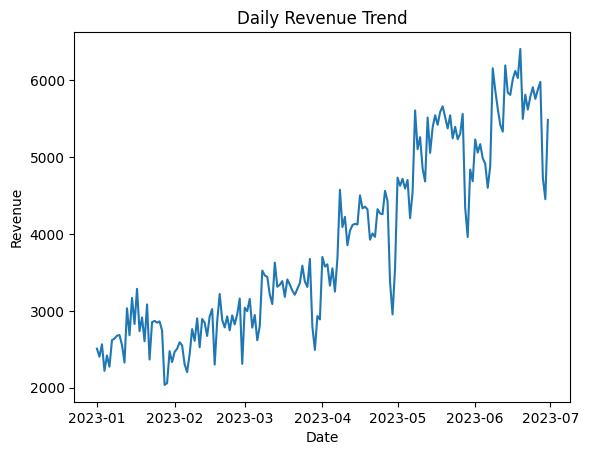

In [22]:
daily_revenue.plot(kind='line', title='Daily Revenue Trend', xlabel='Date', ylabel='Revenue')

### Store Performance Analysis

Classify stores based on sales performance:
- **Total revenue by store**: Identify which stores generate the most revenue.
- **Number of transactions per store**: Compare the number of transactions to the revenue to see which stores are most efficient.

In [23]:
store_performance = df.groupby('store_location')['revenue'].sum().sort_values(ascending=False)

In [24]:
transactions_per_store = df.groupby('store_location')['transaction_id'].count()

In [25]:
performance_summary = pd.DataFrame({'Total Revenue': store_performance, 'Total Transactions': transactions_per_store})
performance_summary

,Total Revenue,Total Transactions
store_location,,
Astoria,232243.91,50599
Hell's Kitchen,236511.17,50735
Lower Manhattan,230057.25,47782


### Product Classification and Performance

Identify top-performing products:
- **Revenue by product type/category**: Find which product types/categories generate the highest revenue.
- **Best-selling products**: Determine which individual products are sold most frequently.

In [26]:
category_performance = df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
category_performance

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: revenue, dtype: float64

In [27]:
product_performance = df.groupby('product_type')['revenue'].sum().sort_values(ascending=False)
product_performance

product_type
Barista Espresso         91406.20
Brewed Chai tea          77081.95
Hot chocolate            72416.00
Gourmet brewed coffee    70034.60
Brewed Black tea         47932.00
Brewed herbal tea        47539.50
Premium brewed coffee    38781.15
Organic brewed coffee    37746.50
Scone                    36866.12
Drip coffee              31984.00
Pastry                   25655.99
Brewed Green tea         23852.50
Biscotti                 19793.53
Premium Beans            14583.50
Organic Beans             8509.50
Housewares                7444.00
Gourmet Beans             6798.00
Clothing                  6163.00
Regular syrup             6084.80
Espresso Beans            5560.25
Chai tea                  4301.25
House blend Beans         3294.00
Herbal tea                2729.75
Drinking Chocolate        2728.04
Black tea                 2711.85
Sugar free syrup          2324.00
Organic Chocolate         1679.60
Green tea                 1470.75
Green beans               1340.00
N

In [ ]:
best_selling_products = df.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending=False)
best_selling_products

In [28]:
# Best-selling products by quantity
best_selling_products = df.groupby('product_name')['transaction_qty'].sum().sort_values(ascending=False)
best_selling_products

product_name
Ethiopia                        13271
Our Old Time Diner Blend        13074
Columbian Medium Roast          13068
Brazilian                       13012
Jamaican Coffee River           12431
Morning Sunrise Chai             9157
Latte                            9099
Earl Grey                        9095
Peppermint                       9067
Sustainably Grown Organic        9003
Serenity Green Tea               8856
Traditional Blend Chai           8839
Dark chocolate                   8793
Spicy Eye Opener Chai            8697
English Breakfast                8670
Lemon Grass                      8566
Cappuccino                       8417
Espresso                         4165
Ouro Brasileiro                  3262
Chocolate Croissant              3096
Sugar Free Vanilla               2905
Chocolate                        2658
Carmel                           2576
Ginger Scone                     2540
Hazelnut                         2372
Cranberry Scone                  2092

In [ ]:
# Classify products based on revenue contribution
df['Product Performance'] = pd.qcut(df.groupby('product_id')['revenue'].transform('sum'), q=3, labels=['Low', 'Medium', 'High'])
df['Product Performance'].value_counts()

In [33]:
# Group by product_id to calculate total revenue and count of records
df_performance = df.groupby('product_name').agg(
    total_revenue=('revenue', 'sum'),
    record_count=('transaction_id', 'count')
).reset_index()

In [34]:
# Classify products based on revenue contribution
df_performance['Product Performance'] = pd.qcut(df_performance['total_revenue'], q=3, labels=['Low', 'Medium', 'High'])

# Sort df_performance by total revenue
df_performance = df_performance.sort_values(by='total_revenue', ascending=False)

df_performance

,product_name,total_revenue,record_count,Product Performance
18,Ethiopia,42304.10,8658,High
43,Sustainably Grown Organic,39065.10,6024,High
28,Jamaican Coffee River,38781.15,8135,High
1,Brazilian,37746.50,8489,High
30,Latte,36369.75,5886,High
13,Dark chocolate,35785.70,5783,High
35,Our Old Time Diner Blend,35278.00,8660,High
10,Columbian Medium Roast,34528.50,8620,High
3,Cappuccino,33639.25,5565,High
32,Morning Sunrise Chai,30587.50,6024,High


### Product or Store Classification for Sale Performance

To classify products or stores based on sales performance, you can rank them:
- **Top 10 Stores and Products** based on revenue.
- **Classify stores** as *'High'*, *'Medium'*, or *'Low'* performing based on predefined revenue thresholds.

In [23]:
# Store classification based on revenue thresholds
performance_summary['Store Classification'] = pd.cut(performance_summary['Total Revenue'],
                                                     bins=[0, 50000, 100000, performance_summary['Total Revenue'].max()],
                                                     labels=['Low', 'Medium', 'High'])

In [24]:
# Classify products based on revenue contribution
df['Product Performance'] = pd.qcut(df.groupby('product_id')['revenue'].transform('sum'), q=3, labels=['Low', 'Medium', 'High'])

In [ ]:
performance_summary

In [ ]:
df[['product_detail', 'Product Performance']].drop_duplicates()
